In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing dataset
df = pd.read_csv("student_scores_v1.csv")
df

,Hours_Studied,Score
0,1.0,10
1,2.0,25
2,3.0,35
3,4.0,50
4,5.0,65
5,6.0,70
6,7.0,85
7,8.0,88
8,9.0,94
9,10.0,98


In [6]:
df.describe()

,Hours_Studied,Score
count,10.00000,10.000000
mean,5.50000,62.000000
std,3.02765,30.811253
min,1.00000,10.000000
25%,3.25000,38.750000
50%,5.50000,67.500000
75%,7.75000,87.250000
max,10.00000,98.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  10 non-null     float64
 1   Score          10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [8]:
df.isnull().sum()

Hours_Studied    0
Score            0
dtype: int64

In [14]:
#Splitting the feature and target
X = df[["Hours_Studied"]]
y = df[["Score"]]

In [15]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly_ft = PolynomialFeatures(degree=2)
poly_X = poly_ft.fit_transform(X)

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_X,y,test_size=0.3,random_state=42)

In [18]:
#Implementing the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


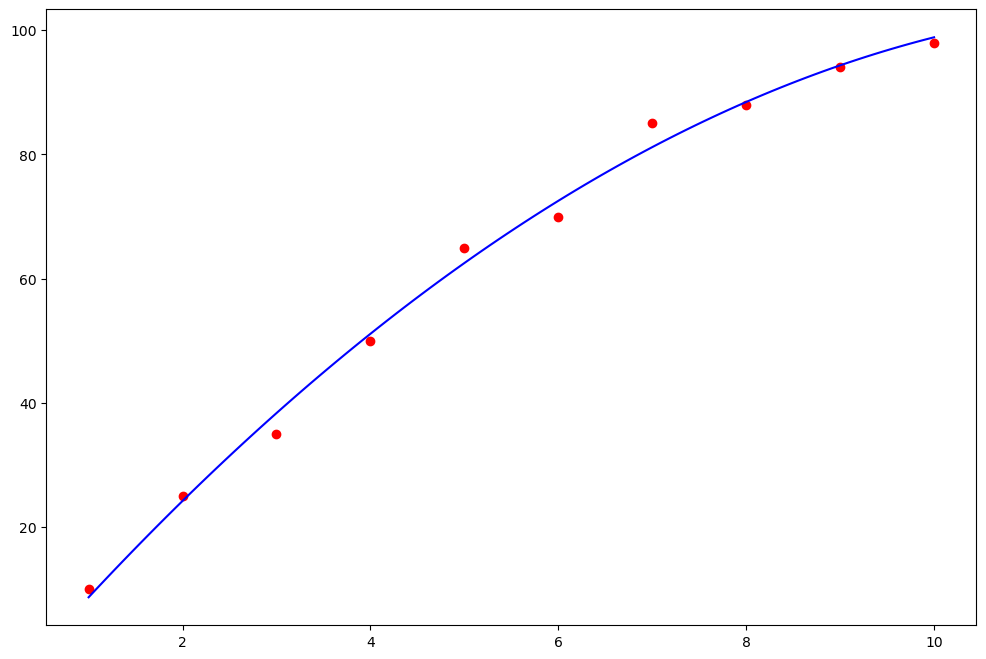

In [33]:
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_grid_poly = poly_ft.transform(X_grid)
y_pred_grid = model.predict(X_grid_poly)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='red')
plt.plot(X_grid, y_pred_grid, color='blue')
plt.show()